In [1]:
using CairoMakie

In [2]:
set_theme!(theme_dark())

In [20]:
include("egm_code.jl")

egm_find_policies (generic function with 1 method)

In [8]:
model = create_EGM_model_aiyagari(;na = 101, nz = 19)

(n = 1919, na = 101, nz = 19, α = 0.33, β = 0.96, A = 0.08, γ = 2.0, δ = 0.1, θ = 2, lb = 0, ub = 200.0, ρ = 0.9, μ = 0.0, σ = 0.003, agrid = [0.0, 0.02, 0.08, 0.18, 0.32, 0.5000000000000001, 0.72, 0.9800000000000001, 1.28, 1.6199999999999999  …  165.62, 169.28, 172.98000000000002, 176.72, 180.5, 184.32, 188.17999999999998, 192.07999999999998, 196.01999999999998, 200.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6], w = 1.0, r_lb = 0.0, r_ub = 0.1, r_iter = 0.05, toler_pol = 1.0e-6, toler_price = 0.001, maxiter_pol = 0, maxiter_prices = 100, print_skip_pol = 5, print_skip_val = 50)

In [21]:
s, c = egm_find_policies(model)

/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.30708945225503514
--------------------
/// Found Policy Functions ///


([0.0 0.0 … 19.173897387552884 29.528802355965162; 0.0 0.0 … 19.18766122881948 29.5425795832751; … ; 134.6822464142712 134.68989038768567 … 154.28555250632337 164.65295445792435; 137.4261711174463 137.43381509086075 … 157.02951324915978 167.39692930180385], [0.022029416207459813 0.03367119517536108 … 10.70380760078146 16.13822878911791; 0.043029416207459814 0.05467119517536108 … 10.711043759514865 16.145451561807974; … ; 71.16078300193627 71.1647808074897 … 81.41315248201096 86.83507668715873; 72.59585829876116 72.59985610431463 … 82.84819173917458 88.2701018432792])

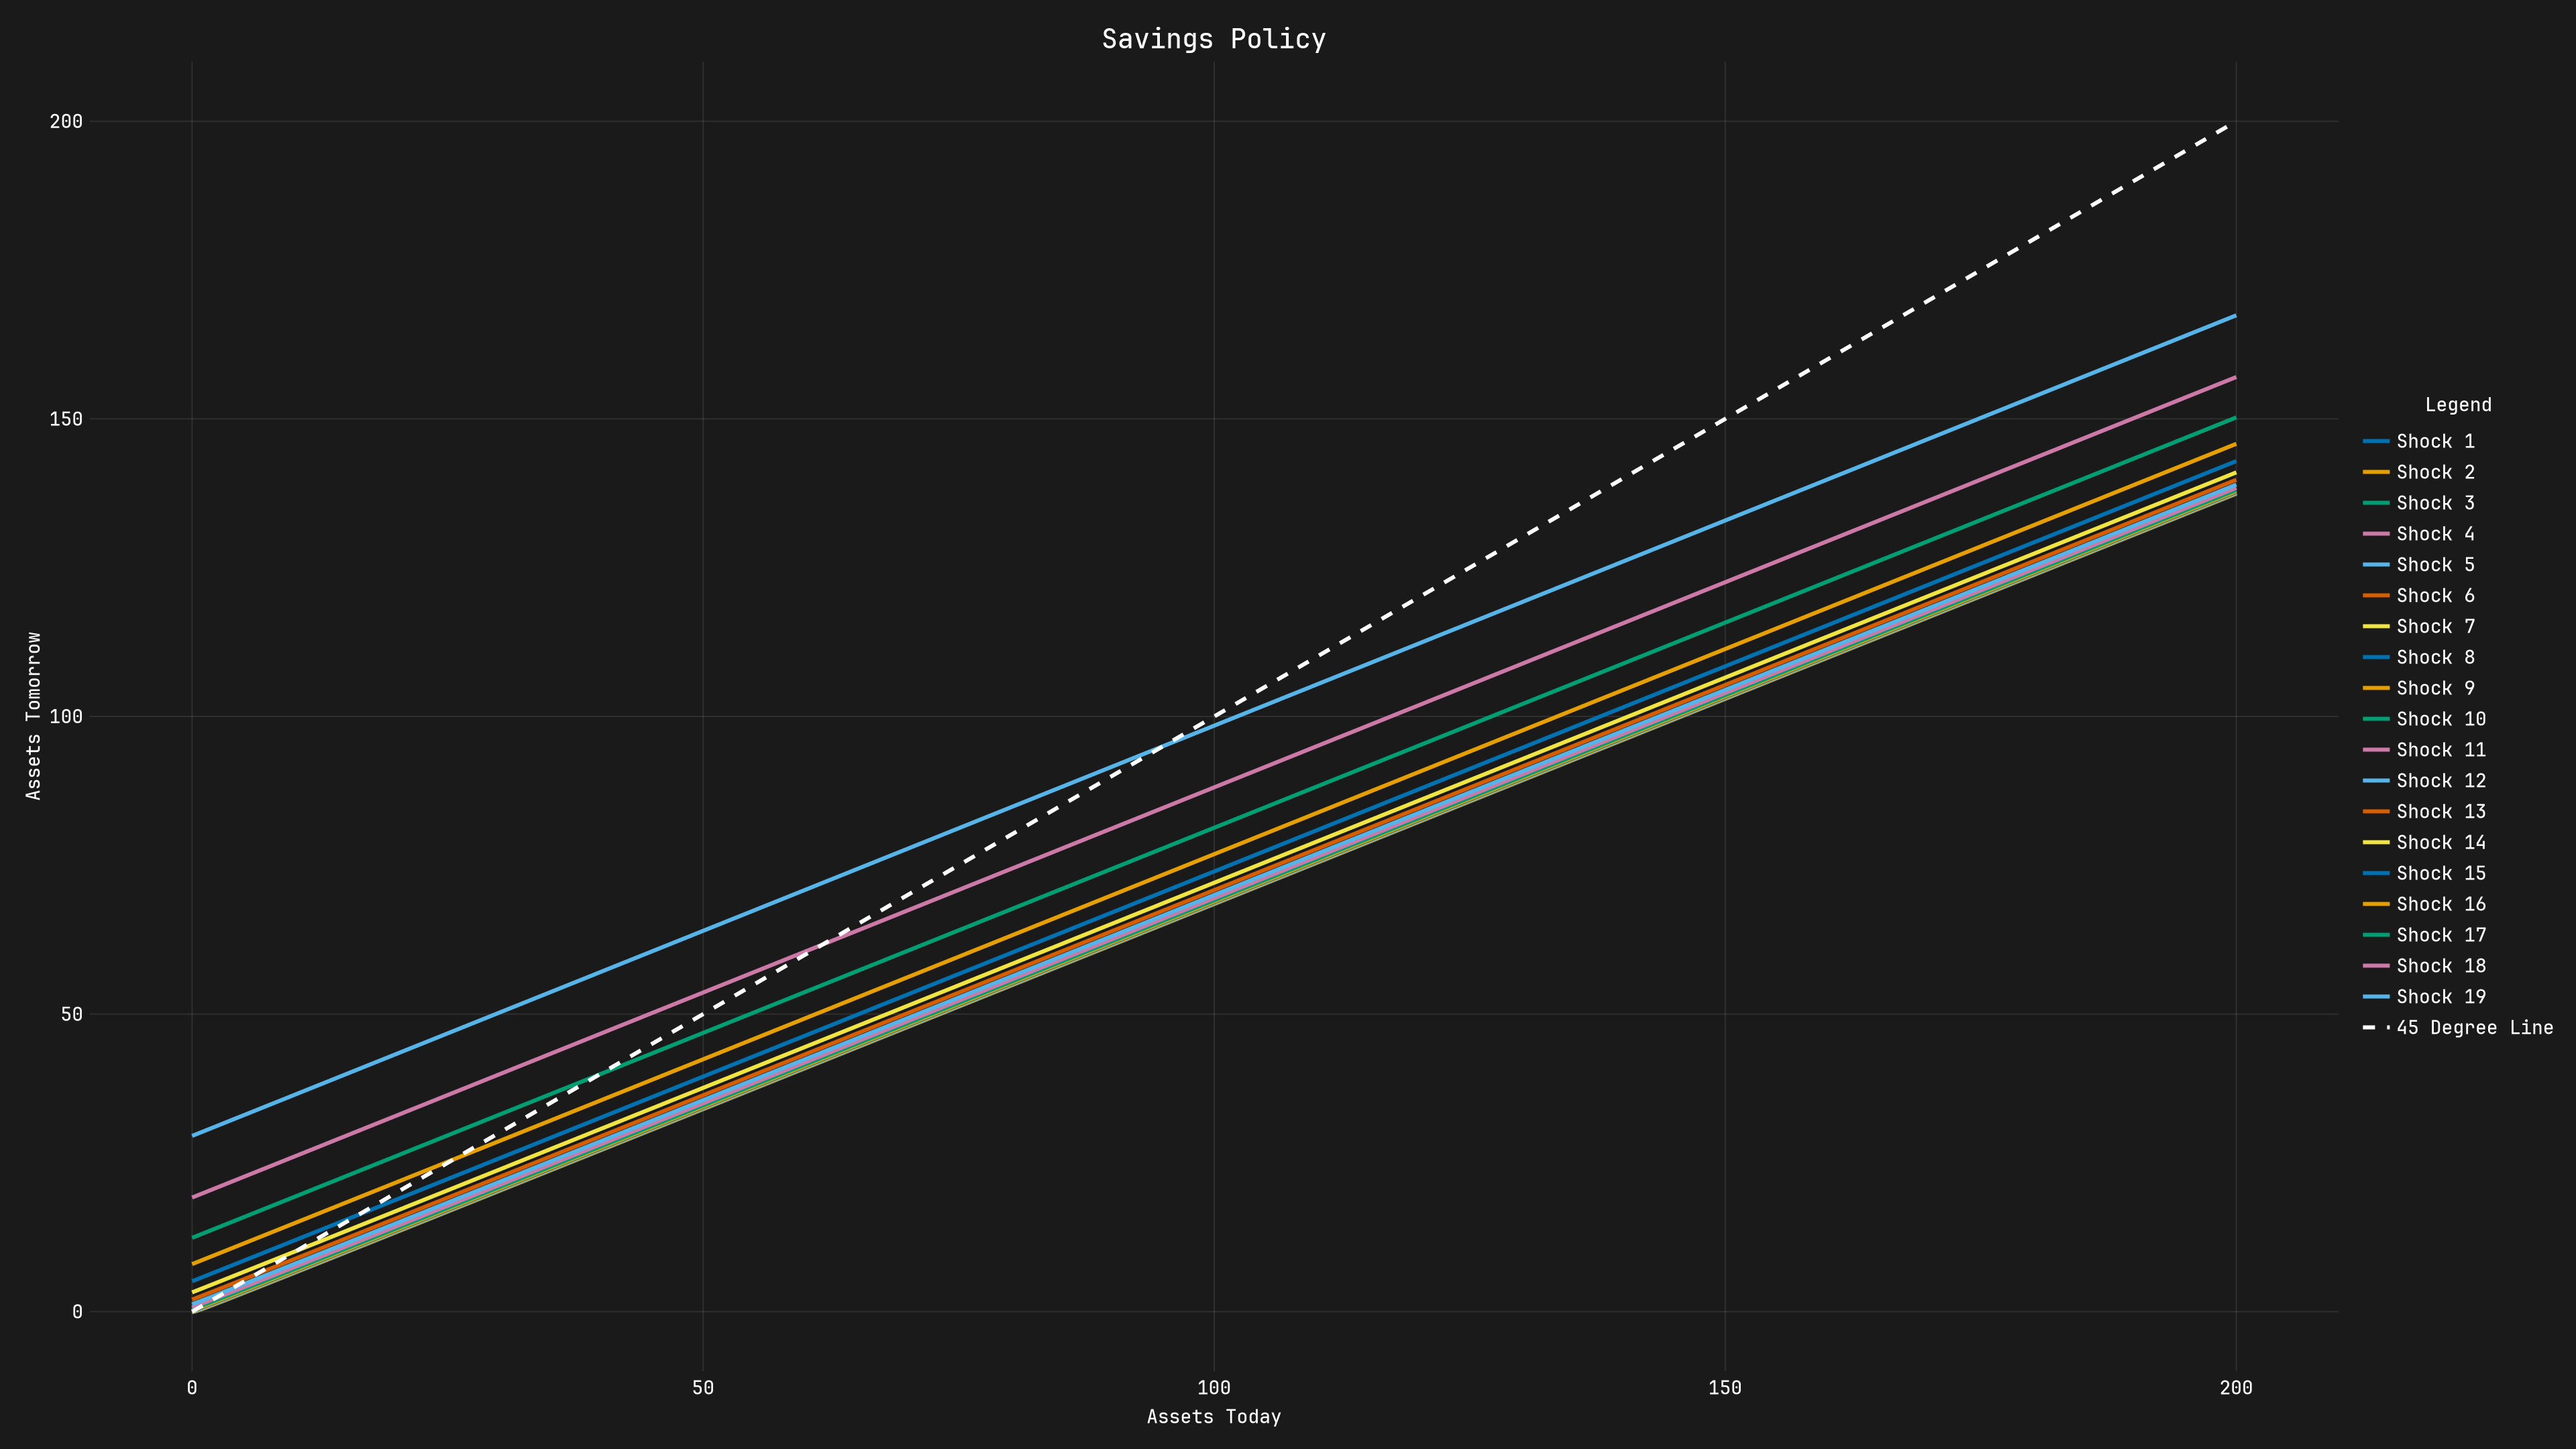

In [22]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Savings Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, s[:, z], linewidth = 3, label = "Shock $z")
end

lines!(ax, model.agrid, model.agrid, color = :white, linestyle = :dash, linewidth = 3, label = "45 Degree Line")

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig

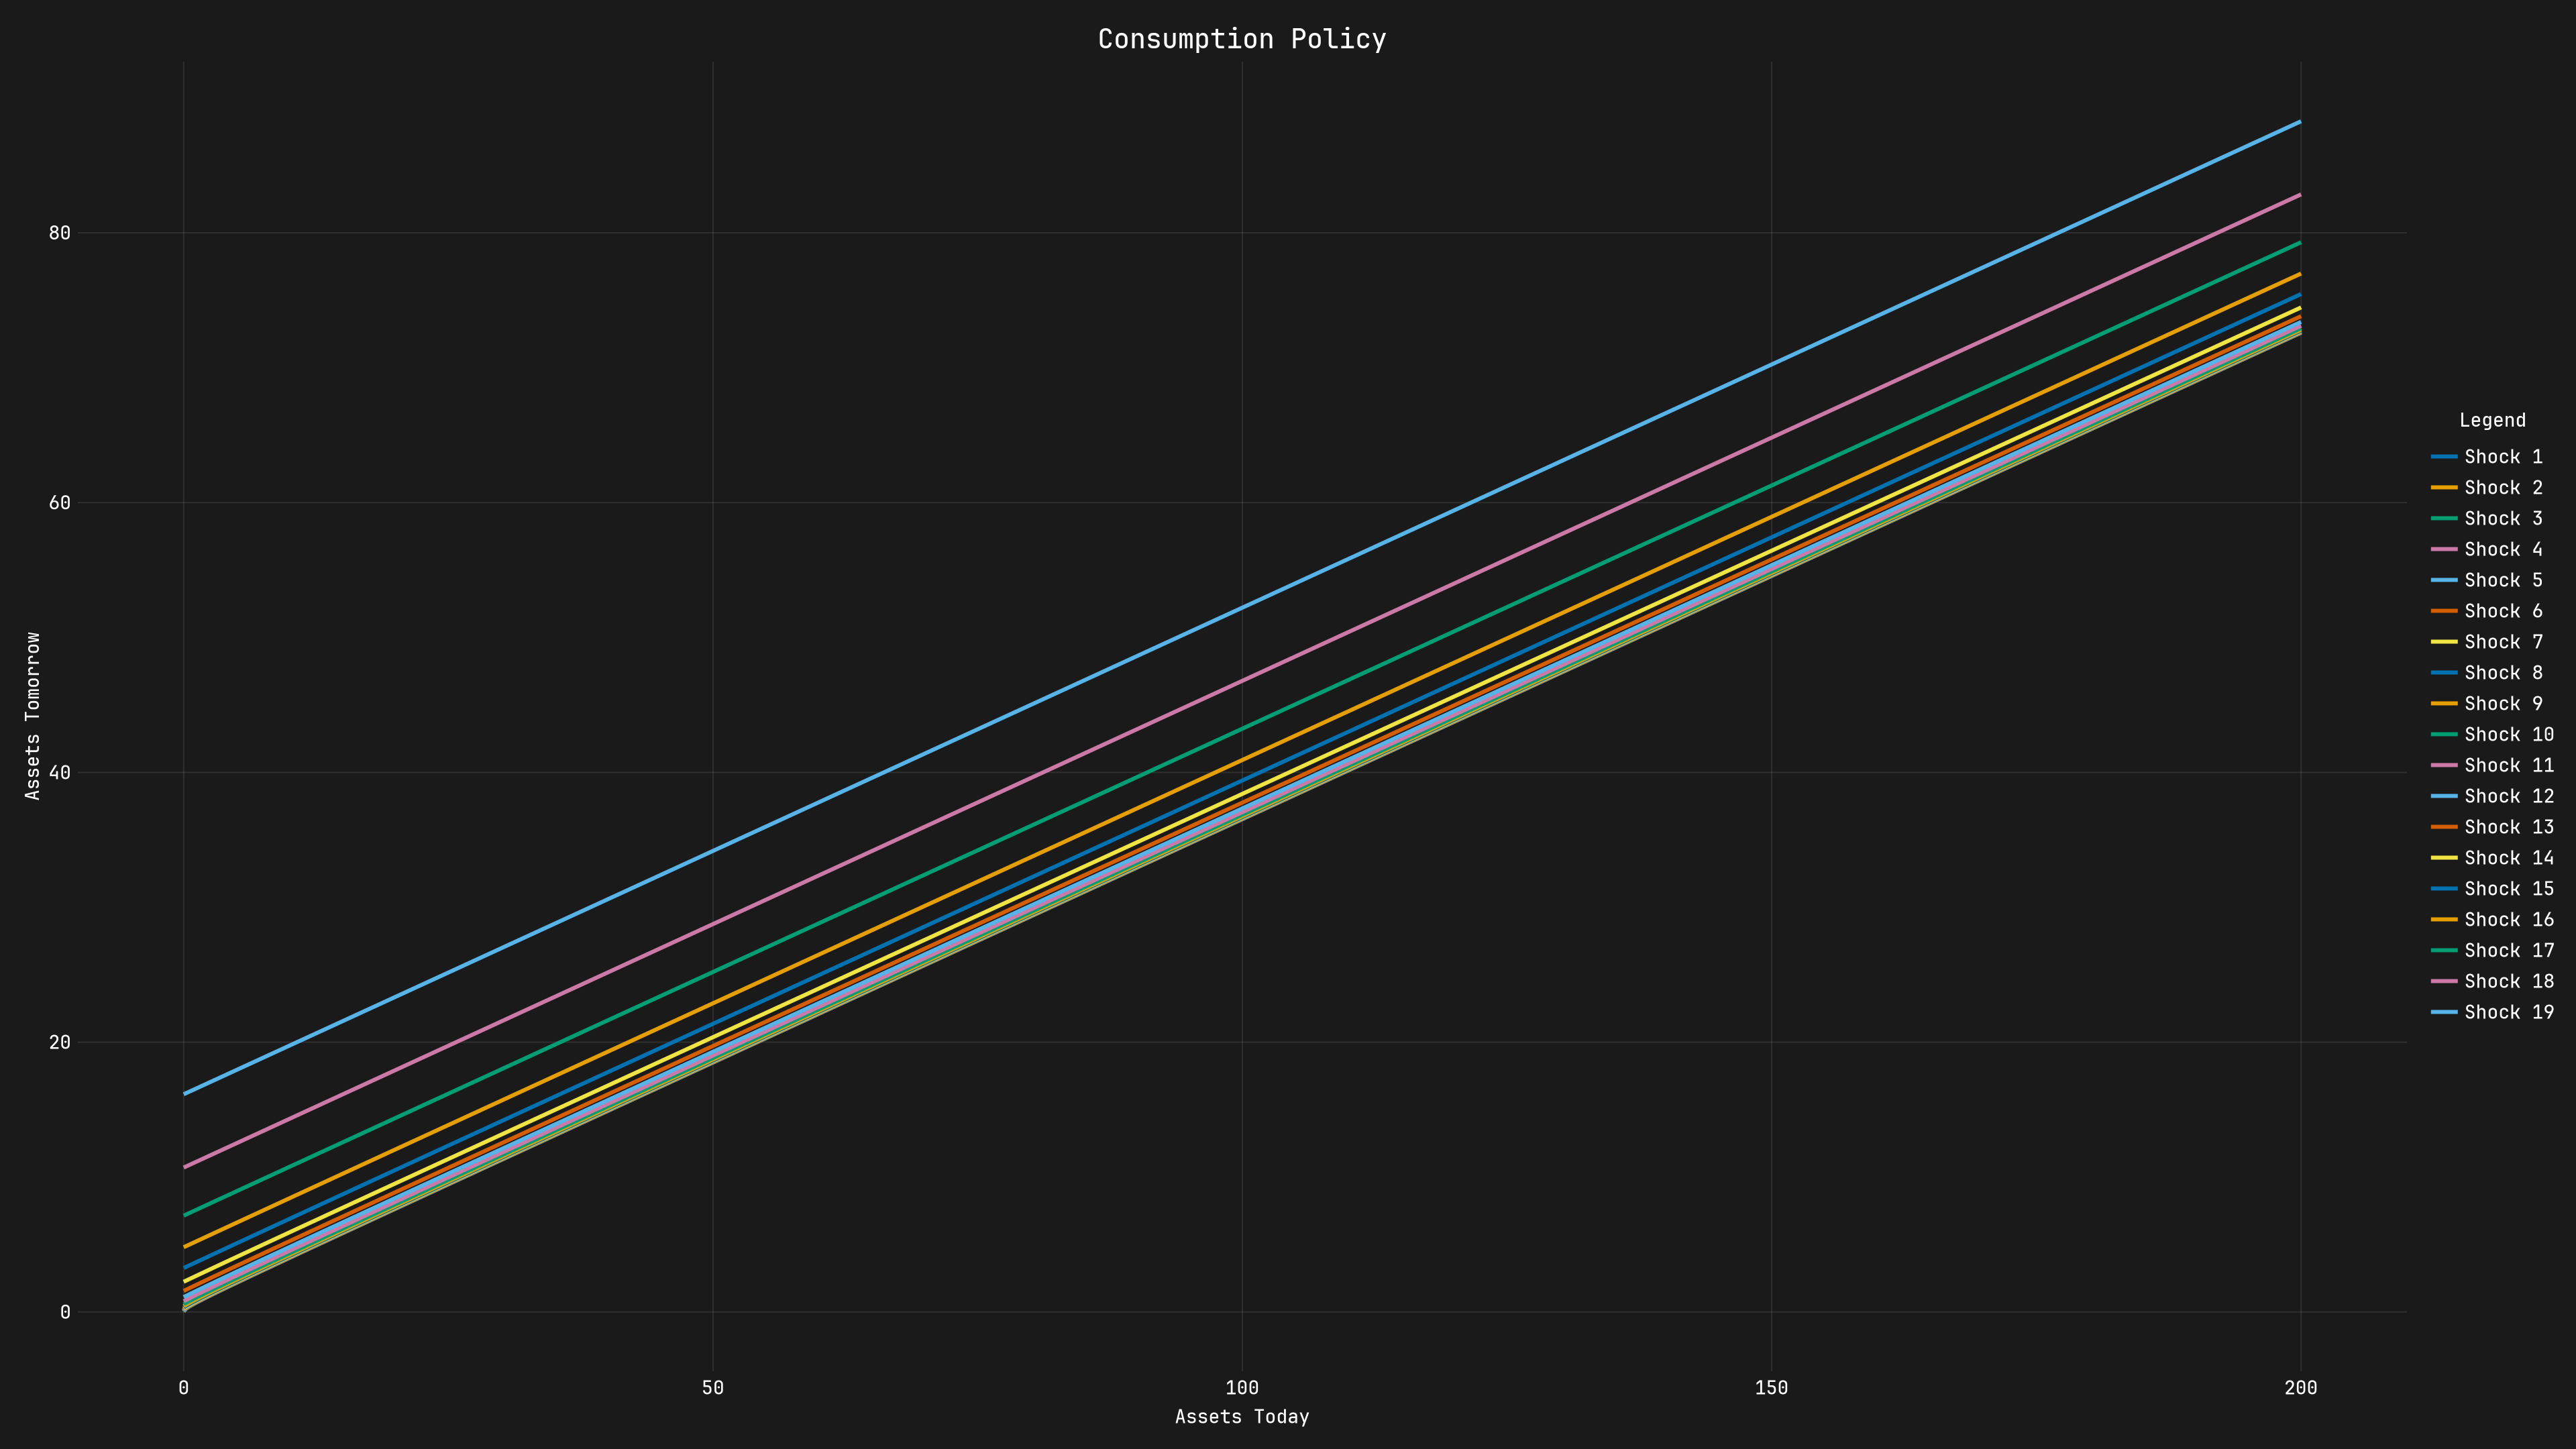

In [23]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Consumption Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, c[:, z], linewidth = 3, label = "Shock $z")
end

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig